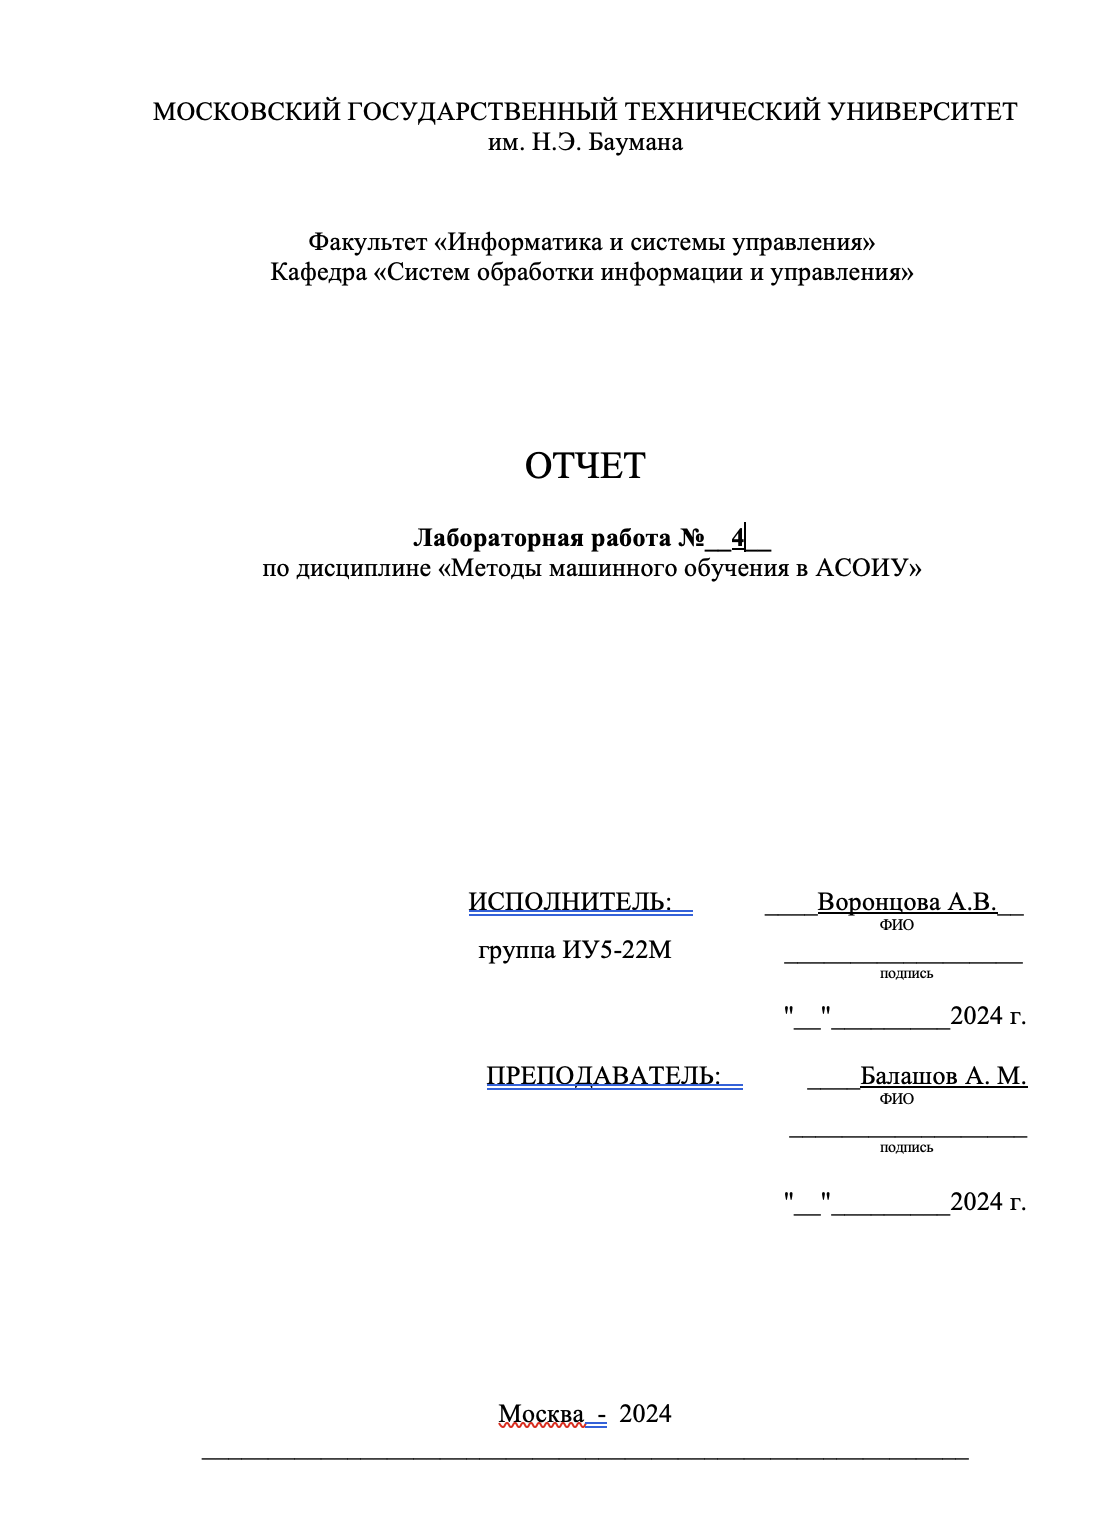

**Задание**

На основе рассмотренного на лекции примера реализуйте алгоритм Policy Iteration для любой среды обучения с подкреплением (кроме рассмотренной на лекции среды Toy Text / Frozen Lake) из библиотеки Gym (или аналогичной библиотеки).

In [18]:
pip install gym


In [22]:
import numpy as np
import gym
import matplotlib.pyplot as plt

def policy_evaluation(policy, env, discount_factor=0.95, theta=1e-5):
    V = np.zeros(env.observation_space.n)
    while True:
        delta = 0
        for s in range(env.observation_space.n):
            v = 0
            for a, action_prob in enumerate(policy[s]):
                for prob, next_state, reward, done in env.P[s][a]:
                    v += action_prob * prob * (reward + discount_factor * V[next_state])
            delta = max(delta, abs(V[s] - v))
            V[s] = v
        if delta < theta:
            break
    return V

def policy_improvement(V, env, discount_factor=0.95):
    policy = np.zeros([env.observation_space.n, env.action_space.n])
    for s in range(env.observation_space.n):
        q = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for prob, next_state, reward, done in env.P[s][a]:
                q[a] += prob * (reward + discount_factor * V[next_state])
        best_action = np.argmax(q)
        policy[s, best_action] = 1.0
    return policy

def policy_iteration(env, discount_factor=0.95):
    policy = np.ones([env.observation_space.n, env.action_space.n]) / env.action_space.n
    while True:
        V = policy_evaluation(policy, env, discount_factor)
        new_policy = policy_improvement(V, env, discount_factor)
        if np.array_equal(new_policy, policy):
            break
        policy = new_policy
    return policy, V

env = gym.make('Taxi-v3')
policy, V = policy_iteration(env)

# Подсчет количества оптимальных действий для каждого состояния
optimal_actions_count = np.sum(policy, axis=1)

optimal_actions_count


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.